In [ ]:
save  

In [ ]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import mysql.connector
import pandas as pd

# Establishing the connection
connection = mysql.connector.connect(
    host='localhost',  # Replace with your host (e.g., '127.0.0.1' or 'localhost')
    user='root',  # Replace with your MySQL username
    password='Ram@221207',  # Replace with your MySQL password
    database='house_prices'  # Replace with your MySQL database name
)

# Creating a SQL query
query = "SELECT * FROM house_data;"  # Replace with your table name

# Reading the data into a pandas DataFrame
df = pd.read_sql(query, connection)

# Close the connection
connection.close()

# Quick check of the loaded data
print(df.head())


   id  lot_area  overall_quality  year_built  total_rooms  garage_area  \
0   1      8450                7        2003            8          548   
1   2      9600                6        1976            6          460   
2   3     11250                7        2001            7          608   
3   4      9550                7        1915            9          642   
4   5      8450                7        2003            8          548   

   sale_price  
0    208500.0  
1    181500.0  
2    223500.0  
3    140000.0  
4    208500.0  


/var/folders/9w/_6wdbf_x2t35hjqymv5bd9hh0000gn/T/ipykernel_6572/591771120.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [5]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)  # Show all columns in DataFrame


In [8]:
# Assuming you have loaded your data into df
df.head()  # Show the first few rows of the DataFrame


,id,lot_area,overall_quality,year_built,total_rooms,garage_area,sale_price
0,1,8450,7,2003,8,548,208500.0
1,2,9600,6,1976,6,460,181500.0
2,3,11250,7,2001,7,608,223500.0
3,4,9550,7,1915,9,642,140000.0
4,5,8450,7,2003,8,548,208500.0


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  # Show columns with missing values


Series([], dtype: int64)

In [10]:
# Get basic statistics of the DataFrame
df.describe()


,id,lot_area,overall_quality,year_built,total_rooms,garage_area,sale_price
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,10.000000,10650.789474,6.473684,1976.894737,6.789474,555.473684,185684.210526
std,5.627314,2587.195920,1.218762,31.133931,1.583910,158.936524,64476.785341
min,1.000000,7200.000000,4.000000,1915.000000,4.000000,240.000000,85000.000000
25%,5.500000,8775.000000,6.000000,1957.000000,6.000000,470.000000,141500.000000
50%,10.000000,9600.000000,7.000000,1992.000000,7.000000,548.000000,181500.000000
75%,14.500000,12540.000000,7.000000,2001.000000,8.000000,625.000000,216000.000000
max,19.000000,15170.000000,9.000000,2008.000000,10.000000,892.000000,345000.000000


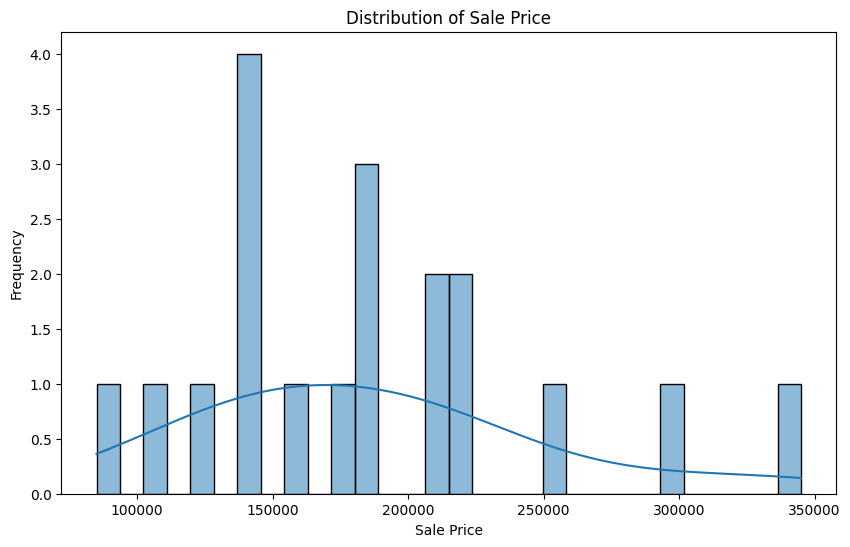

In [11]:
# Plotting the distribution of Sale Price
plt.figure(figsize=(10, 6))
sns.histplot(df['sale_price'], bins=30, kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


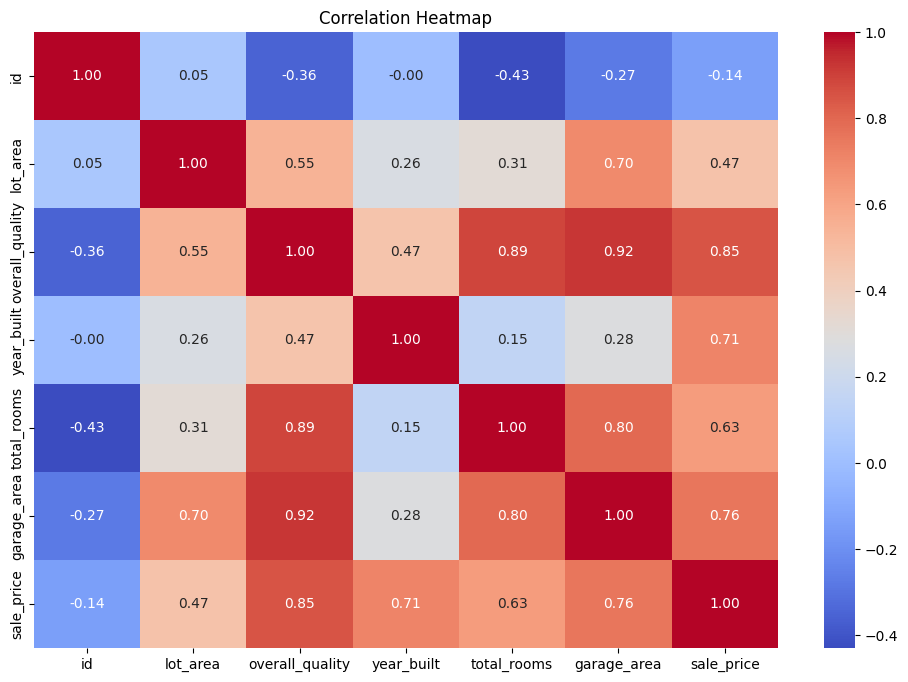

In [12]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [13]:
# Define bins and labels for overall quality
bins_quality = [0, 4, 6, 8, 10]  # Define the bin edges
labels_quality = ['Low', 'Medium', 'High', 'Very High']  # Define the labels

# Create a new column with binned values
df['quality_category'] = pd.cut(df['overall_quality'], bins=bins_quality, labels=labels_quality, right=True)

# Check the distribution of the new categorical feature
print(df['quality_category'].value_counts())


quality_category
High         9
Medium       8
Low          1
Very High    1
Name: count, dtype: int64


In [14]:
# Define bins and labels for year built
current_year = 2024
bins_year_built = [0, 1950, 1980, 2000, current_year]  # Define the bin edges
labels_year_built = ['Old', 'Mid-Aged', 'New', 'Recent']  # Define the labels

# Create a new column with binned values
df['age_category'] = pd.cut(df['year_built'], bins=bins_year_built, labels=labels_year_built, right=False)

# Check the distribution of the new categorical feature
print(df['age_category'].value_counts())


age_category
Recent      7
Old         4
Mid-Aged    4
New         4
Name: count, dtype: int64


In [15]:
# Display the first few rows of the updated DataFrame
print(df[['overall_quality', 'quality_category', 'year_built', 'age_category']].head())


   overall_quality quality_category  year_built age_category
0                7             High        2003       Recent
1                6           Medium        1976     Mid-Aged
2                7             High        2001       Recent
3                7             High        1915          Old
4                7             High        2003       Recent


In [16]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['quality_category', 'age_category'], drop_first=True)

# Define the features (X) and the target variable (y)
X = df_encoded.drop(['sale_price', 'id'], axis=1)  # Dropping target variable and any irrelevant features
y = df_encoded['sale_price']  # Target variable


In [17]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the sizes of the splits
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (15, 11)
Testing set size: (4, 11)


In [19]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()


In [20]:
# Fit the model
model.fit(X_train, y_train)


LinearRegression()

In [30]:
import joblib

joblib.dump(model, 'house_price_model.pkl')  # Save the model


['house_price_model.pkl']

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 129346.83636033215
Root Mean Squared Error (RMSE): 148994.4069913235


/Users/manojrammopati/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


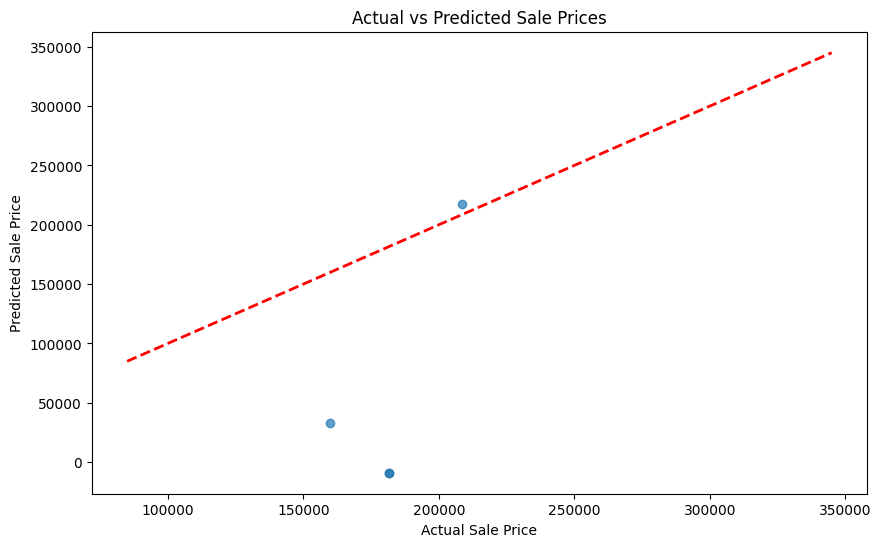

In [22]:
# Plotting Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Prices')
plt.show()


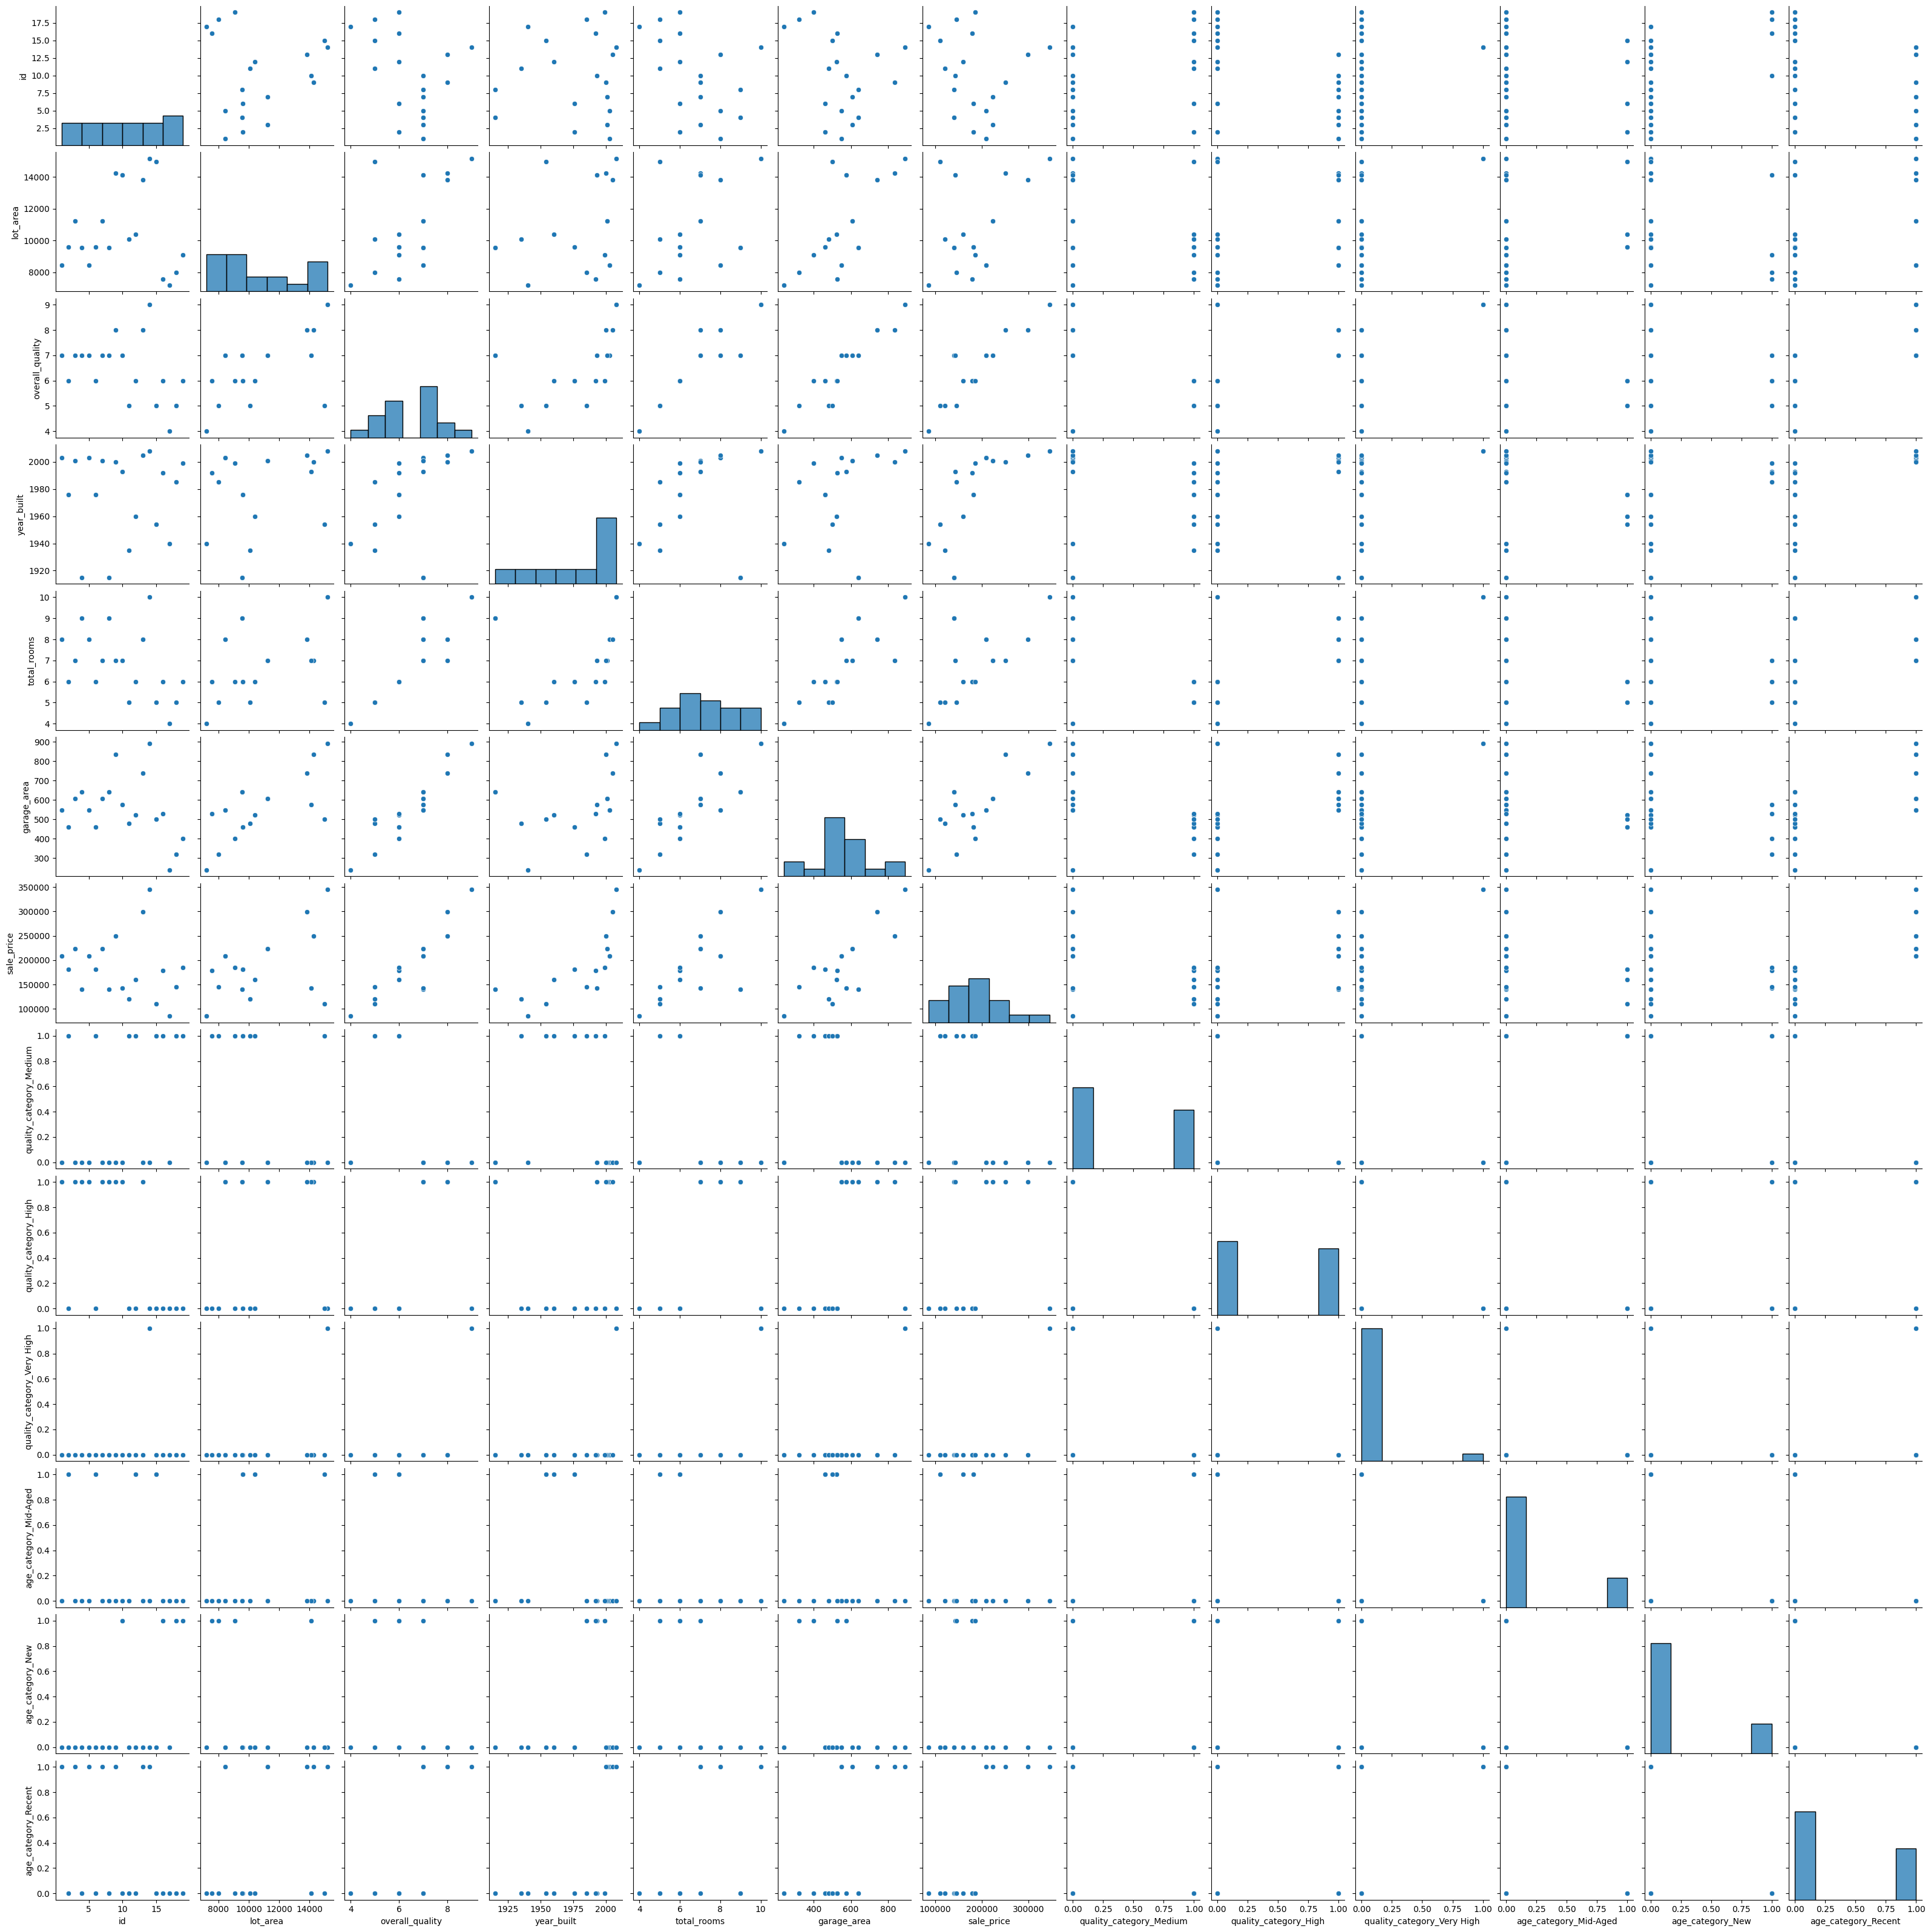

In [23]:
sns.pairplot(df_encoded)  # For visualizing relationships between features
plt.show()


In [24]:
# Fill missing values with the mean or median

# Using IQR to detect outliers
Q1 = df['sale_price'].quantile(0.25)
Q3 = df['sale_price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['sale_price'] < (Q1 - 1.5 * IQR)) | (df['sale_price'] > (Q3 + 1.5 * IQR)))]


In [25]:
# Example: Creating a feature for house age
df['house_age'] = current_year - df['year_built']


In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)  # Adjust number of components as needed
X_reduced = pca.fit_transform(X)


In [27]:
from sklearn.model_selection import cross_val_score

# Evaluate model using cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold CV
print("Cross-Validation Scores:", cv_scores)


Cross-Validation Scores: [ -1.44745634   0.08933777 -11.86172291   0.78796985 -26.01103888]


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {'fit_intercept': [True, False], 'normalize': [True, False]}
grid = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)


ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [36]:
# For tree-based models
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotting feature importances
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

In [38]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 455 kB 713 kB/s eta 0:00:01
     |████████████████████████████████| 78 kB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.7 MB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 28.8 MB 4.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

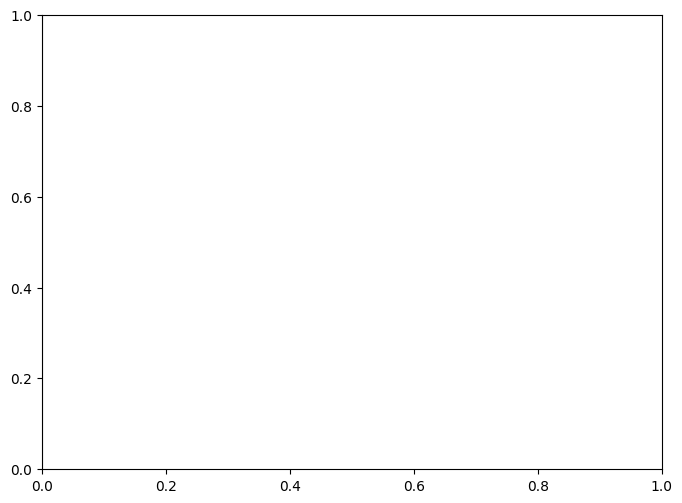

In [41]:
import shap

explainer = shap.LinearExplainer(model,X_train)
shap_values = explainer(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test)


In [31]:
import joblib

joblib.dump(model, 'house_price_model.pkl')  # Save the model


['house_price_model.pkl']

In [33]:
pip install flask

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 101 kB 1.5 MB/s ta 0:00:01
     |████████████████████████████████| 227 kB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 18.8 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 21.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)
model = joblib.load('house_price_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict([data['features']])  # Adjust according to input
    return jsonify(prediction=prediction[0])

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
Traceback (most recent call last):
  File "/Users/manojrammopati/Library/Python/3.9/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/manojrammopati/Library/Python/3.9/lib/python/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/Users/manojrammopati/Library/Python/3.9/lib/python/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
  File "/Users/manojrammopati/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelapp.py", line 692, in initialize
    self.init_sockets()
  File "/Users/manojrammopati/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelapp.py", line 331, in init_sockets
    self.shell_port = self._bind_socket(self.shell_socket, self.shell_port)
  File "/Users/manojrammopati/Library/Python/3.9/lib/pyth

SystemExit: 1

/Users/manojrammopati/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
